<a href="https://colab.research.google.com/github/MATHKIMS/DSAC_license/blob/main/%ED%95%AD%EA%B3%B5%EC%9A%B4%ED%95%AD_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 항공운항 데이터분석

https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

항공기들의 운항 파일을 다운로드


airports.dat


routes.dat : 운행 경로 데이터

In [ ]:
import csv

2번째 열: 공항이름

In [ ]:
f=open("/content/data/airports.txt",encoding='cp949')
for row in csv.reader(f):
    print(row[1])


러시아와 호주의 공항은 어떤게 있을까?

In [19]:
f=open("/content/data/airports.txt",encoding='cp949')
for row in csv.reader(f):
    if (row[3]=="Australia") or (row[3]=="Russia"):
        print(row[1])
f.close()

Yakutsk Airport
Mirny Airport
Ignatyevo Airport
Khabarovsk-Novy Airport
Provideniya Bay Airport
Sokol Airport
Pevek Airport
Yelizovo Airport
Yuzhno-Sakhalinsk Airport
Vladivostok International Airport
Chita-Kadala Airport
Bratsk Airport
Irkutsk Airport
Ulan-Ude Airport (Mukhino)
Pulkovo Airport
Murmansk Airport
Khrabrovo Airport
Abakan Airport
Barnaul Airport
Kemerovo Airport
Omsk Central Airport
Krasnodar Pashkovsky International Airport
Uytash Airport
Mineralnyye Vody Airport
Stavropol Shpakovskoye Airport
Platov International Airport
Sochi International Airport
Astrakhan Airport
Volgograd International Airport
Chelyabinsk Balandino Airport
Magnitogorsk International Airport
Nizhnevartovsk Airport
Bolshoye Savino Airport
Surgut Airport
Koltsovo Airport
Bryansk Airport
Sheremetyevo International Airport
Migalovo Air Base
Voronezh International Airport
Vnukovo International Airport
Syktyvkar Airport
Kazan International Airport
Orenburg Central Airport
Ufa International Airport
Kurumoch

In [ ]:
#위도와 경도 데이터

In [20]:
latitudes={}
longitudes={}

In [21]:
f=open("/content/data/airports.txt",encoding='cp949')
for row in csv.reader(f):
    airport_id=row[0]
    latitudes[airport_id]=float(row[6]) # 위도 딕셔너리 추가 / 값은 실수로 변환
    longitudes[airport_id]=float(row[7])

In [24]:
latitudes

{'1': -6.081689834590001,
 '2': -5.20707988739,
 '3': -5.826789855957031,
 '4': -6.569803,
 '5': -9.443380355834961,
 '6': -3.58383011818,
 '7': 61.1604995728,
 '8': 64.19090271,
 '9': 67.0122218992,
 '10': 76.5311965942,
 '11': 65.66000366210938,
 '12': 65.2833023071289,
 '13': 64.295601,
 '14': 65.952301,
 '15': 66.05809783935547,
 '16': 63.985000610352,
 '17': 65.555801,
 '18': 64.1299972534,
 '19': 66.133301,
 '20': 63.42430114746094,
 '21': 46.48500061035156,
 '22': 50.0564002991,
 '23': 44.639702,
 '24': 51.3918991089,
 '25': 49.079833,
 '26': 68.534401,
 '27': 49.13249969482422,
 '28': 48.33060073852539,
 '29': 64.29889678960001,
 '30': 49.950801849365234,
 '31': 49.91,
 '32': 69.1081008911,
 '33': 49.054970224899996,
 '34': 49.2963981628,
 '35': 47.007801,
 '36': 47.990799,
 '37': 67.816704,
 '38': 52.0750007629,
 '39': 49.1528015137,
 '40': 70.4860992432,
 '41': 64.1932983398,
 '42': 64.04309844970703,
 '43': 61.37110137939453,
 '44': 49.4681015015,
 '45': 49.21080017089844,
 

In [ ]:
longitudes

#### geopy
- 두 지점의 위도와 경도를 알고, 두 지점간의 거리를 계산한다.
    - great_circle() : 거리를 계산(단위는 km, miles 등 선택)
    - geodesic : 측지선
        - 지구 (구형) 상의 2 지점간의 가장 짧은 거리(곡면을 따라) 계산 

In [25]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from geopy.distance import great_circle, geodesic

In [27]:
great_circle((37, 127), (38, 129)).km #시작지점(위도,경로), 끝지점(위도,경도) .km/mile

208.54241590474152

# 이어서 항공 거리계산

1.   항목 추가
2.   항목 추가



In [30]:
distance=[]
f=open("/content/data/routes.txt",encoding='cp949')
for row in csv.reader(f):
    source_airport=row[3] #시작지점 일련번호
    dest_airport=row[5] #목적지 일련번호
    if (source_airport in latitudes) and (dest_airport in latitudes): #key가 있는가?
        source_lat=latitudes[source_airport] #실제 위도 값 지정
        source_long=longitudes[source_airport]

        dest_lat=latitudes[dest_airport] 
        dest_long=longitudes[dest_airport]

        distance.append(great_circle((source_lat,source_long),(dest_lat,dest_long)).km)

In [31]:
distance

[1506.8277330777387,
 1040.4397895432182,
 448.16554181018654,
 770.5095886094415,
 1338.6333576053873,
 715.6503614468733,
 892.3840483798505,
 951.4335423246899,
 1171.8831507434213,
 1008.2545343994207,
 1685.4289052915774,
 1171.883150743421,
 1506.8277330777385,
 1040.4397895432187,
 770.5095886094417,
 715.6503614468731,
 1008.2545343994209,
 1216.8462864592682,
 723.5242256058544,
 1216.8462864592682,
 1372.8883537724205,
 1464.0590032741716,
 448.16554181018637,
 892.3840483798502,
 1685.428905291577,
 1372.8883537724205,
 554.7041432647163,
 1012.6041440304277,
 1557.1740217580923,
 1324.6136239685436,
 1338.6333576053873,
 1370.2991943842778,
 723.5242256058546,
 554.7041432647164,
 1012.6041440304275,
 1324.6136239685436,
 1370.2991943842778,
 951.4335423246899,
 1464.0590032741718,
 1557.1740217580925,
 488.3403114474664,
 1199.360850196032,
 1338.6333576053873,
 608.6439208266945,
 488.34031144746683,
 608.6439208266945,
 882.1877871724888,
 1458.8263707687943,
 517.487003

Text(0.5, 0, 'Numeber of filight')

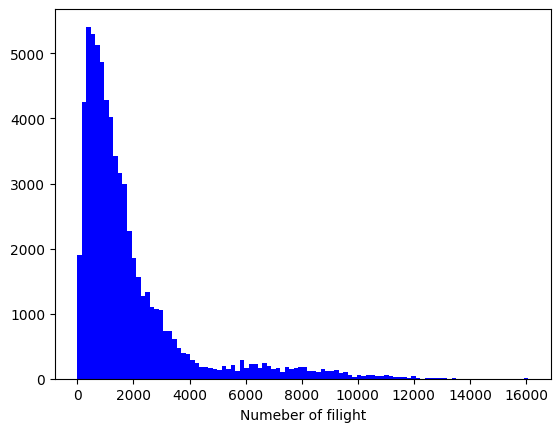

In [35]:
import matplotlib.pyplot as plt

plt.hist(distance,100,facecolor='b') #plt.hist(data,bins=100,facecolor='b)
plt.xlabel("Distance (km)")
plt.xlabel("Numeber of filight")